In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')
print(f'Original shape: {df.shape}')
df.head()

Original shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
filas_sin_descripcion = df[df['Description'].isnull()]
print(filas_sin_descripcion['UnitPrice'].describe())

count    1454.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: UnitPrice, dtype: float64


In [8]:
print(df[df['Description'].isnull()])

       InvoiceNo StockCode Description  Quantity    InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/10 11:52        0.0   
1970      536545     21134         NaN         1  12/1/10 14:32        0.0   
1971      536546     22145         NaN         1  12/1/10 14:33        0.0   
1972      536547     37509         NaN         1  12/1/10 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/10 14:34        0.0   
...          ...       ...         ...       ...            ...        ...   
535322    581199     84581         NaN        -2  12/7/11 18:26        0.0   
535326    581203     23406         NaN        15  12/7/11 18:31        0.0   
535332    581209     21620         NaN         6  12/7/11 18:35        0.0   
536981    581234     72817         NaN        27  12/8/11 10:33        0.0   
538554    581408     85175         NaN        20  12/8/11 14:06        0.0   

        CustomerID         Country  
622            NaN  United

In [9]:
print(df[df['CustomerID'].isnull()].head())

     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

        InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/10 11:52       0.00         NaN  United Kingdom  
1443  12/1/10 14:32       2.51         NaN  United Kingdom  
1444  12/1/10 14:32       2.51         NaN  United Kingdom  
1445  12/1/10 14:32       0.85         NaN  United Kingdom  
1446  12/1/10 14:32       1.66         NaN  United Kingdom  


In [10]:
datos_sin_cliente = df[df['CustomerID'].isnull()]
print(datos_sin_cliente['UnitPrice'].describe())

count    135080.000000
mean          8.076577
std         151.900816
min      -11062.060000
25%           1.630000
50%           3.290000
75%           5.450000
max       17836.460000
Name: UnitPrice, dtype: float64


In [11]:
df_limpio = df.dropna(subset=['CustomerID','Description'])
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


¿Cuáles son los 5 productos más vendidos?

In [12]:
top_5_productos = (df_limpio.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5))
print('\--- 5 Productos Mas Vendidos (por unidades) ---')
print(top_5_productos)

\--- 5 Productos Mas Vendidos (por unidades) ---
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
Name: Quantity, dtype: int64


In [13]:
df_limpio['TotalSales'] = df_limpio['Quantity'] * df_limpio['UnitPrice']

¿Qué países (fuera del Reino Unido) compran más?

In [14]:
df_internacional = df_limpio[df_limpio['Country'] != 'United Kingdom']

top_paises = (df_internacional.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5))

print('--- 5 paises con Mayor Ingreso (excluyendo Reino Unido) ---')
print(top_paises)

--- 5 paises con Mayor Ingreso (excluyendo Reino Unido) ---
Country
Netherlands    284661.54
EIRE           250285.22
Germany        221698.21
France         196712.84
Australia      137077.27
Name: TotalSales, dtype: float64


¿Quiénes son los clientes más valiosos?

In [15]:
top_clientes = (df_limpio.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(5))
print('--- 5 Clientes mas valiosos (por Gasto Total) ---')
print(top_clientes)

--- 5 Clientes mas valiosos (por Gasto Total) ---
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: TotalSales, dtype: float64


In [16]:
df_limpio['InvoiceDate'] = pd.to_datetime(df_limpio['InvoiceDate'])

In [17]:
ultima_fecha = df_limpio['InvoiceDate'].max()
FECHA_SNAPSHOT = ultima_fecha + dt.timedelta(days=1)
print(f'Fecha de Corte (Referencia): {FECHA_SNAPSHOT.date()}')

Fecha de Corte (Referencia): 2011-12-10


In [18]:
ultimas_compras = df_limpio.groupby('CustomerID')['InvoiceDate'].max()
df_recencia = (FECHA_SNAPSHOT - ultimas_compras).dt.days
df_recencia = df_recencia.reset_index(name='Recencia')
print('--- Recencia (Dias desde la ultima compra) ---')
print(df_recencia.head())

--- Recencia (Dias desde la ultima compra) ---
   CustomerID  Recencia
0     12346.0       326
1     12347.0         2
2     12348.0        75
3     12349.0        19
4     12350.0       310


In [19]:
df_frecuencia_monetaria = df_limpio.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'TotalSales': 'sum'})
df_frecuencia_monetaria.rename(columns={'InvoiceNo': 'Frecuencia', 'TotalSales': 'Monetaria'}, inplace=True)
print('--- Frecuencia y Monetaria de los 5 clientes principales ---')
print(df_frecuencia_monetaria.head())

--- Frecuencia y Monetaria de los 5 clientes principales ---
            Frecuencia  Monetaria
CustomerID                       
12346.0              2       0.00
12347.0              7    4310.00
12348.0              4    1797.24
12349.0              1    1757.55
12350.0              1     334.40


In [20]:
df_rfm = df_recencia.merge(df_frecuencia_monetaria, on='CustomerID')
print('--- DataFrame Final RFM Combinado (R, F, M) ---\n')
print(df_rfm.head())

--- DataFrame Final RFM Combinado (R, F, M) ---

   CustomerID  Recencia  Frecuencia  Monetaria
0     12346.0       326           2       0.00
1     12347.0         2           7    4310.00
2     12348.0        75           4    1797.24
3     12349.0        19           1    1757.55
4     12350.0       310           1     334.40


In [21]:
df_rfm['R_Score'] = pd.qcut(df_rfm['Recencia'], q=5, labels=[5, 4, 3, 2, 1])
df_rfm['F_Score'] = pd.qcut(df_rfm['Frecuencia'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetaria'], q=5, labels=[1, 2, 3, 4, 5])

print('--- DataFrame RFM con Puntuaciones (Scores) ---')
print(df_rfm.head())

--- DataFrame RFM con Puntuaciones (Scores) ---
   CustomerID  Recencia  Frecuencia  Monetaria R_Score F_Score M_Score
0     12346.0       326           2       0.00       1       2       1
1     12347.0         2           7    4310.00       5       4       5
2     12348.0        75           4    1797.24       2       3       4
3     12349.0        19           1    1757.55       4       1       4
4     12350.0       310           1     334.40       1       1       2


In [22]:
df_rfm['RFM_Segment'] = df_rfm['R_Score'].astype(str) + \
                        df_rfm['F_Score'].astype(str) + \
                        df_rfm['M_Score'].astype(str)

print('--- Puntuaciones con segmento concatenado ---')
print(df_rfm.head())

--- Puntuaciones con segmento concatenado ---
   CustomerID  Recencia  Frecuencia  Monetaria R_Score F_Score M_Score  \
0     12346.0       326           2       0.00       1       2       1   
1     12347.0         2           7    4310.00       5       4       5   
2     12348.0        75           4    1797.24       2       3       4   
3     12349.0        19           1    1757.55       4       1       4   
4     12350.0       310           1     334.40       1       1       2   

  RFM_Segment  
0         121  
1         545  
2         234  
3         414  
4         112  


In [23]:
df_rfm['R_Score'] = df_rfm['R_Score'].astype(int)
df_rfm['F_Score'] = df_rfm['F_Score'].astype(int)
df_rfm['M_Score'] = df_rfm['M_Score'].astype(int)


In [ ]:
df_rfm['Segment_Tipo'] = 'Otros'
df_rfm.loc[(df_rfm['R_Score'] == 5) & (df_rfm['F_Score'] >= 4) & (df_rfm['M_Score'] >= 4), 'Segment_Tipo'] = 'Campeones'
campeones = df_rfm[df_rfm['Segment_Tipo'] == 'Campeones']

print('--- Resument de Segmentacion RFM ---')
print(f'Total de Clientes: {df_rfm.shape[0]}')
print(f'Clientes "Campeones" encontrados: {campeones.shape[0]}')
print('Top 5 Clientes Campeones por Gastos:')
print(campeones[['CustomerID', 'Monetaria', 'Segment_Tipo', 'RFM_Segment']].sort_values(by='Monetaria', ascending=False).head())

--- Resument de Segmentacion RFM ---
Total de Clientes: 4372
Clientes "Campeones" encontrados: 573
Top 5 Clientes Campeones por Gastos:
      CustomerID  Monetaria Segment_Tipo RFM_Segment
1703     14646.0  279489.02    Campeones         555
4233     18102.0  256438.49    Campeones         555
3758     17450.0  187482.17    Campeones         555
1895     14911.0  132572.62    Campeones         555
1345     14156.0  113384.14    Campeones         555


In [25]:
top_100_campeones = campeones.sort_values(by='Monetaria', ascending=False).head(100)

gasto_minimo = top_100_campeones['Monetaria'].min()
print('--- Top 100 Clientes para Evento Exclusivo ---')
print(f'Total de Clientes Seleccionados: {top_100_campeones.shape[0]}')
print(top_100_campeones[['CustomerID', 'Monetaria', 'RFM_Segment']].tail())
print(f'El Gasto Minimo del Cliente numero 100 es: ${gasto_minimo:.2f}')

--- Top 100 Clientes para Evento Exclusivo ---
Total de Clientes Seleccionados: 100
      CustomerID  Monetaria RFM_Segment
3194     16672.0    8093.59         555
1123     13854.0    8025.02         555
4238     18109.0    7925.32         555
1813     14796.0    7839.51         555
2178     15290.0    7803.77         555
El Gasto Minimo del Cliente numero 100 es: $7803.77


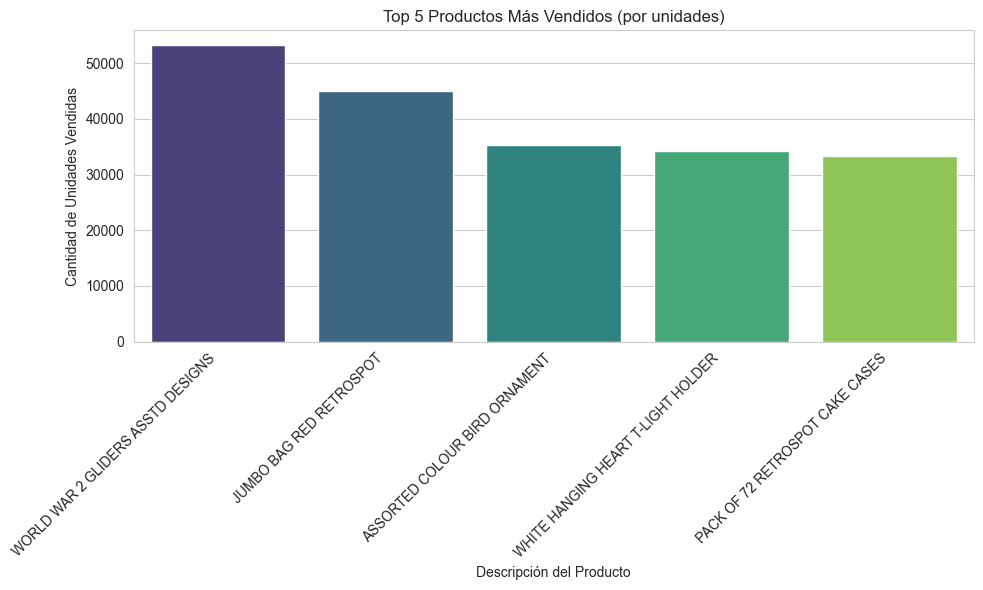

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_productos.index, y=top_5_productos.values, palette='viridis')

plt.title('Top 5 Productos Más Vendidos (por unidades)')
plt.xlabel('Descripción del Producto')
plt.ylabel('Cantidad de Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

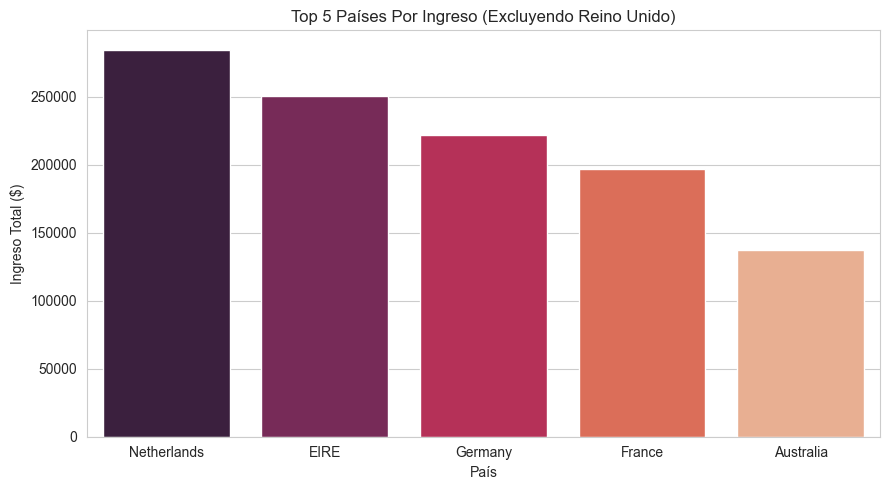

In [28]:
plt.figure(figsize=(9, 5))
sns.barplot(x=top_paises.index, y=top_paises.values, palette='rocket')

plt.title('Top 5 Países Por Ingreso (Excluyendo Reino Unido)')
plt.xlabel('País')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

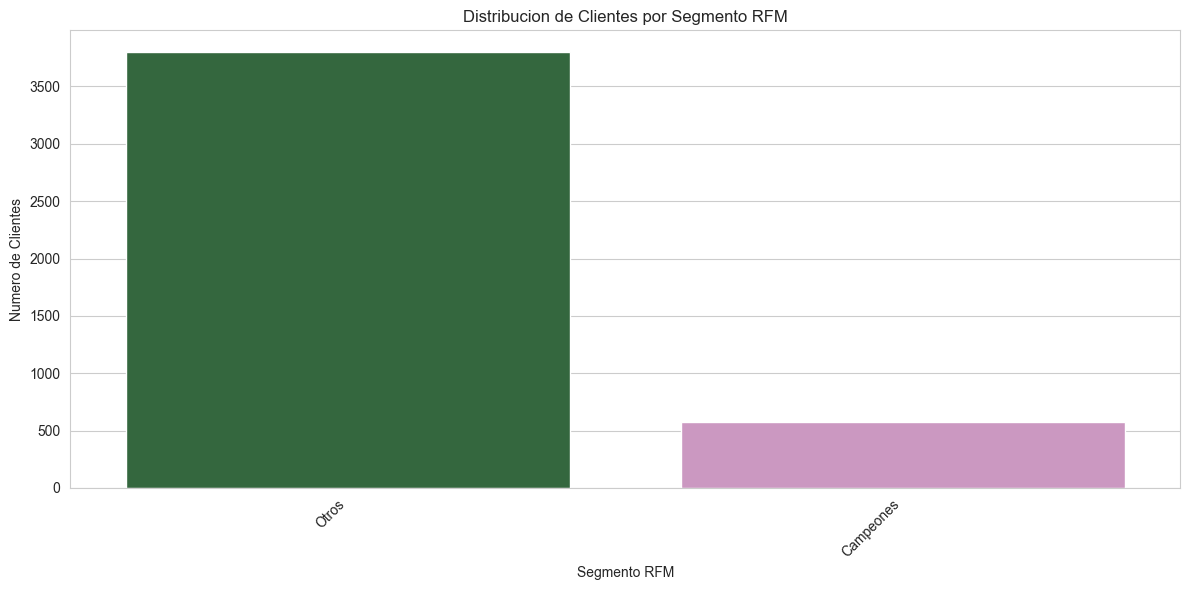

In [31]:
plt.figure(figsize=(12, 6))

segment_counts = df_rfm['Segment_Tipo'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='cubehelix')

plt.title('Distribucion de Clientes por Segmento RFM')
plt.xlabel('Segmento RFM')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()